In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

%matplotlib inline

In [2]:
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=['Month'])
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df['trend'] = df['Passengers'].ewm(halflife=12).mean()
df['detrended'] = df['Passengers'] / df['trend']
df_seasonality = df['detrended'].groupby(df.index.month).mean().rename('seasonality')


In [4]:
df = df.join(df_seasonality, how='left', on=df.index.month)

In [5]:
df['preprocessed'] = df['detrended'] - df['seasonality']
# df['prediction_raw'] = df['preprocessed'].mean()


In [6]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[:training_size],df[training_size:len(df)]


In [7]:
# X_train,X_test = train_data['preprocessed'].shift(1).values[1:].reshape(-1, 1), test_data['preprocessed'].shift(1).values[1:].reshape(-1, 1)
X_train,X_test = train_data['preprocessed'].shift(1).values[1:].reshape(-1, 1), test_data['preprocessed'].shift(1).values[1:].reshape(-1, 1)
y_train,y_test = train_data['preprocessed'].values[1:],test_data['preprocessed'].values[1:]

In [8]:
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(92, 1),y_train:(92,),X_test:(50, 1),y_test(50,)


In [18]:
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

y_predicted = np.zeros(len(y_test)+1)
y_predicted[1:] = reg.predict(y_test.reshape(-1,1))

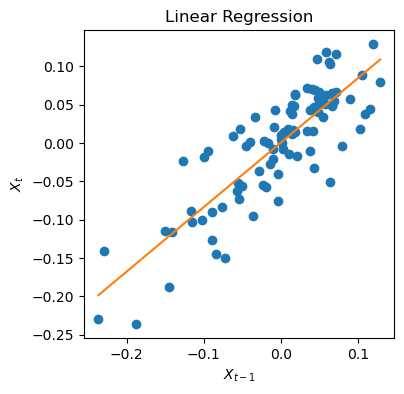

In [19]:
plt.figure(figsize=(4,4))
plt.plot(X_train[:, 0], y_train, 'o')
plt.plot([X_train.min(), X_train.max()], [reg.coef_[0] * X_train.min() + reg.intercept_, reg.coef_[0] * X_train.max() + reg.intercept_], '-')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.title('Linear Regression')
plt.show()

/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T/ipykernel_51780/510599637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction_raw'] = y_predicted


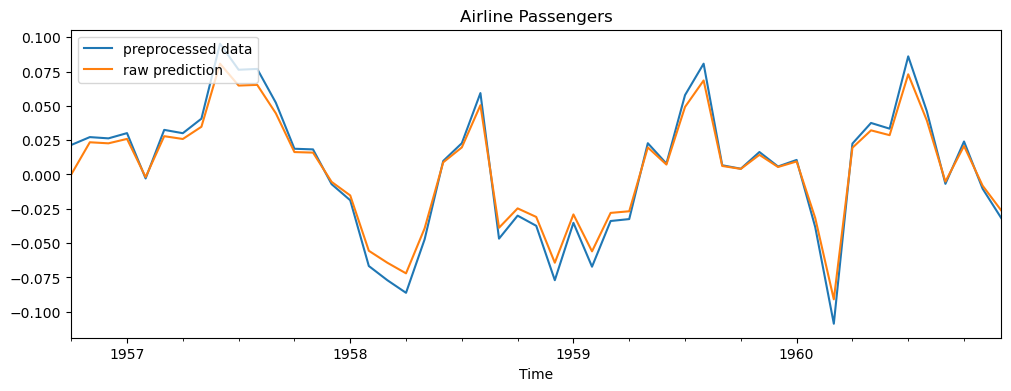

In [20]:
test_data['prediction_raw'] = y_predicted

plt.figure(figsize=(12,4))
test_data['preprocessed'].plot(label='preprocessed data')
test_data['prediction_raw'].plot(label='raw prediction')
plt.xlabel('Time')
plt.ylabel('')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

In [12]:
test_data.shape

(51, 6)

/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T/ipykernel_51780/3562623198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = (test_data['prediction_raw'] + test_data['seasonality']) * test_data['trend']


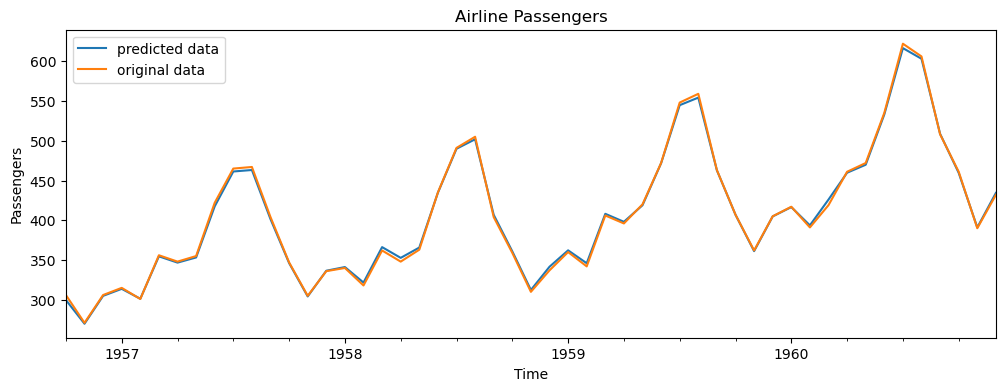

MSE: 7.7802
MAE: 2.2349
MAPE: 0.0056


In [13]:
test_data['prediction'] = (test_data['prediction_raw'] + test_data['seasonality']) * test_data['trend']

plt.figure(figsize=(12,4))
test_data['prediction'].plot(label='predicted data')
test_data['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((test_data['Passengers'] - test_data['prediction'])**2).mean())
print('MAE: %0.4f' % (test_data['Passengers'] - test_data['prediction']).abs().mean())
print('MAPE: %0.4f' % ((test_data['Passengers'] - test_data['prediction']) / test_data['Passengers']).abs().mean())

/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T/ipykernel_51780/3562623198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = (test_data['prediction_raw'] + test_data['seasonality']) * test_data['trend']


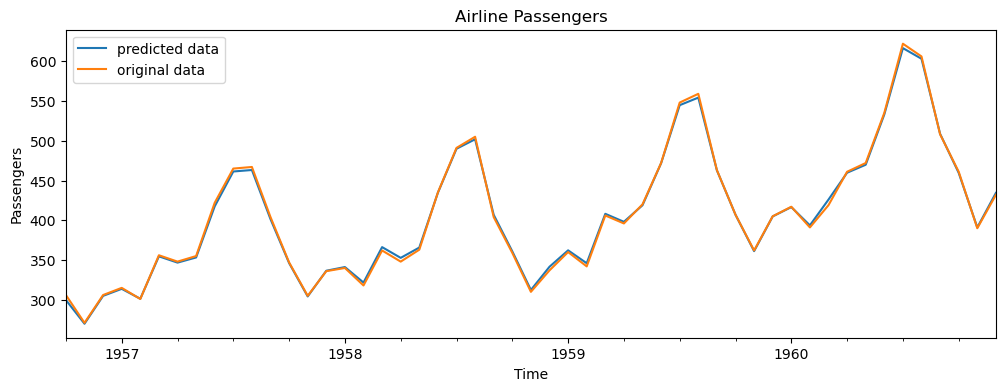

MSE: 7.7802
MAE: 2.2349
MAPE: 0.0056


In [24]:
test_data['prediction'] = (test_data['prediction_raw'] + test_data['seasonality']) * test_data['trend']

plt.figure(figsize=(12,4))
test_data['prediction'].plot(label='predicted data')
test_data['Passengers'].plot(label='original data')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.legend(loc='upper left')
plt.show()

print('MSE: %0.4f' % ((test_data['Passengers'] - test_data['prediction'])**2).mean())
print('MAE: %0.4f' % (test_data['Passengers'] - test_data['prediction']).abs().mean())
print('MAPE: %0.4f' % ((test_data['Passengers'] - test_data['prediction']) / test_data['Passengers']).abs().mean())